In [24]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.colors import LinearSegmentedColormap

In [9]:
df = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)

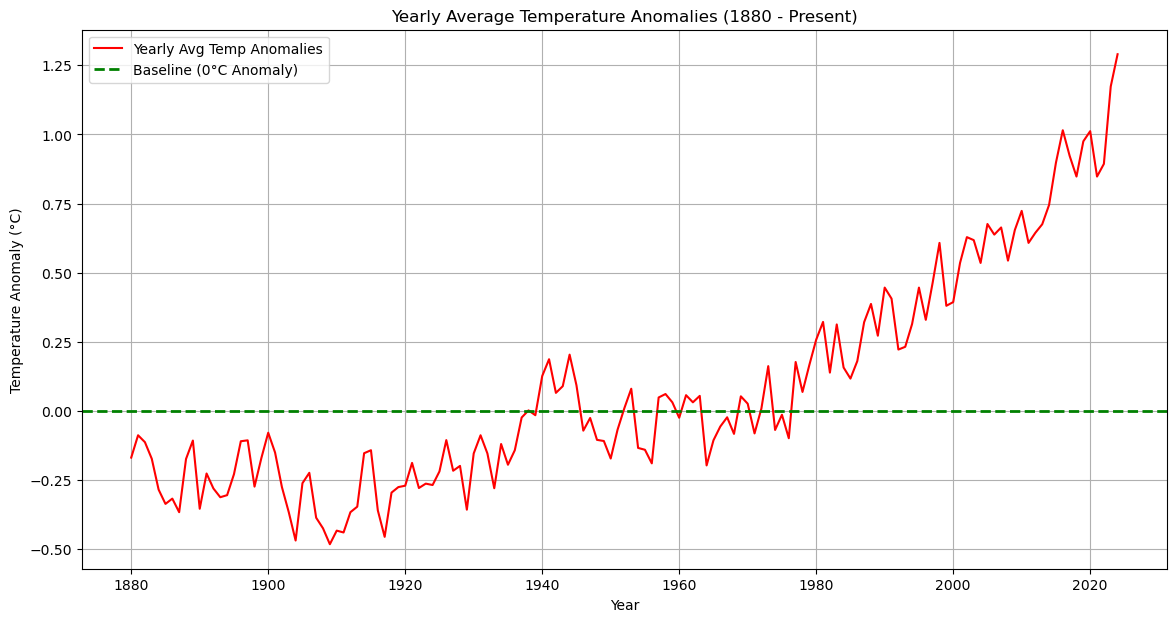

In [22]:
for month in df.columns[1:]:
    df[month] = pd.to_numeric(df[month], errors='coerce')
df['Yearly Avg'] = df.iloc[:, 1:13].mean(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Yearly Avg'], label='Yearly Avg Temp Anomalies', color='r')
plt.axhline(0, color='g', linestyle='--', linewidth=2, label='Baseline (0°C Anomaly)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Yearly Average Temperature Anomalies (1880 - Present)')
plt.legend()
plt.grid(True)
plt.show()


The graph displays the yearly average temperature anomalies from the year 1880 to the present. Temperature anomalies are deviations from a reference temperature baseline, indicating whether a particular year was warmer or cooler compared to the baseline.

## Interpretation
1. **Long-term Trend**: The graph shows a clear long-term warming trend over the past century and a half. The average temperature anomalies have generally increased, particularly in the latter half of the 20th century and the early 21st century.
2. **Fluctuations**: Despite the overall warming trend, there are noticeable fluctuations in temperature anomalies on a year-to-year basis. Some years exhibit significant deviations from the trend, which can be attributed to various natural and anthropogenic factors.
3. **Recent Decades**: The recent decades show a more pronounced increase in temperature anomalies, indicating accelerated warming. This period aligns with increased industrial activity and higher greenhouse gas emissions.
4. **Historical Context**: The earlier part of the graph shows more stable and lower temperature anomalies, which is consistent with pre-industrial and early industrial periods.

## Significance
The graph highlights the ongoing and increasing trend of global warming. It serves as a visual representation of how average global temperatures have changed over the past 140 years. This data is critical for understanding climate change, informing policy decisions, and driving efforts to mitigate and adapt to its impacts.



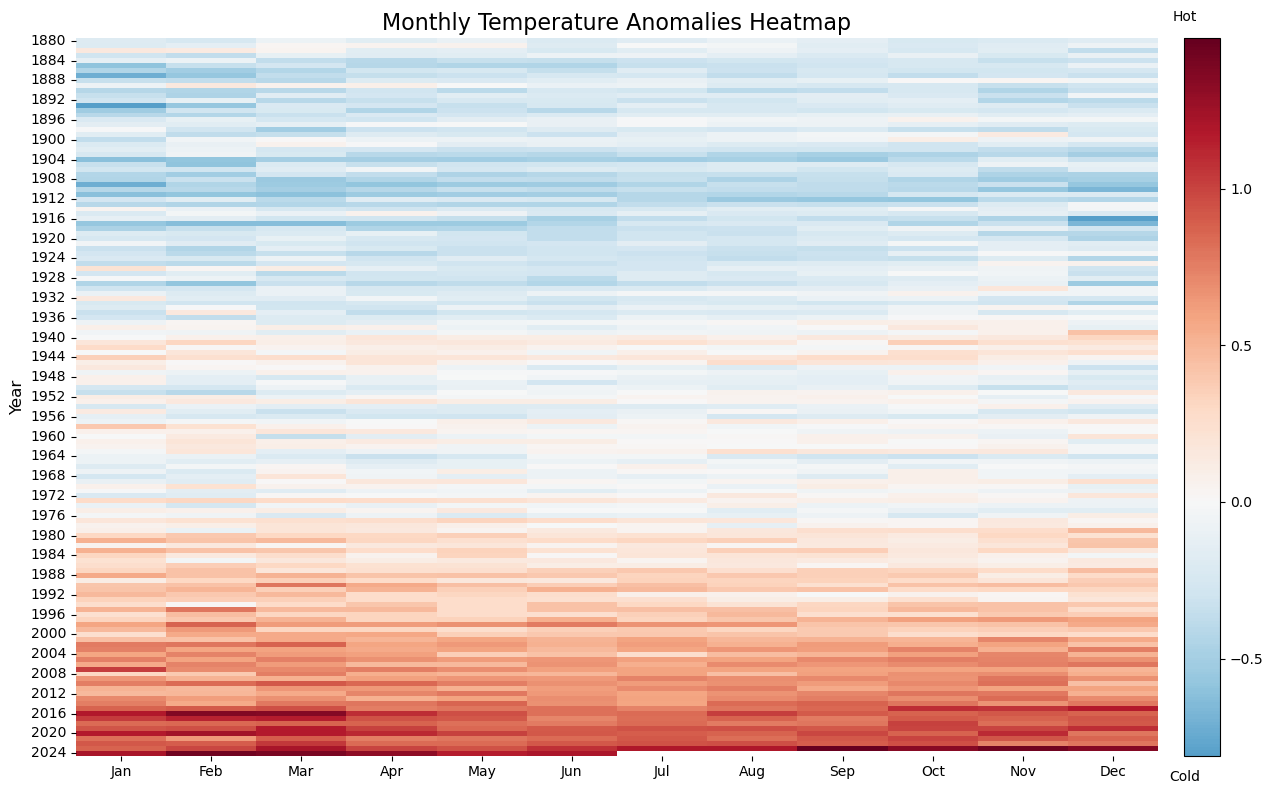

In [25]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = df[['Year'] + months].set_index('Year')
fig, ax = plt.subplots(figsize=(14, 8))
heatmap = sns.heatmap(data, cmap='RdBu_r', center=0, ax=ax, cbar=False)
cbar = fig.colorbar(heatmap.collections[0], ax=ax, pad=0.02)
cbar.ax.text(0, -0.02, 'Cold', va='top', ha='center', transform=cbar.ax.transAxes)
cbar.ax.text(0, 1.02, 'Hot', va='bottom', ha='center', transform=cbar.ax.transAxes)
plt.title('Monthly Temperature Anomalies Heatmap', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

# Monthly Temperature Anomalies Heatmap
)

This heatmap visualizes monthly temperature anomalies from 1880 to the present day. The color scale ranges from blue (cooler temperatures) to red (warmer temperatures), with white representing neutral or no significant anomaly.

Key observations:

1. **Early years (1880-1940s)**: Predominantly blue, indicating cooler temperatures compared to the baseline.

2. **1940-1944**: A slight shift towards red, suggesting a brief warming period.

3. **Mid-20th century to present**: Gradual increase in red coloration, becoming more intense towards the bottom of the heatmap.

4. **Recent decades**: Dominated by deep red colors, indicating significant warming trends.

5. **Seasonal patterns**: Vertical stripes may be visible, showing consistent seasonal variationss in recent years.

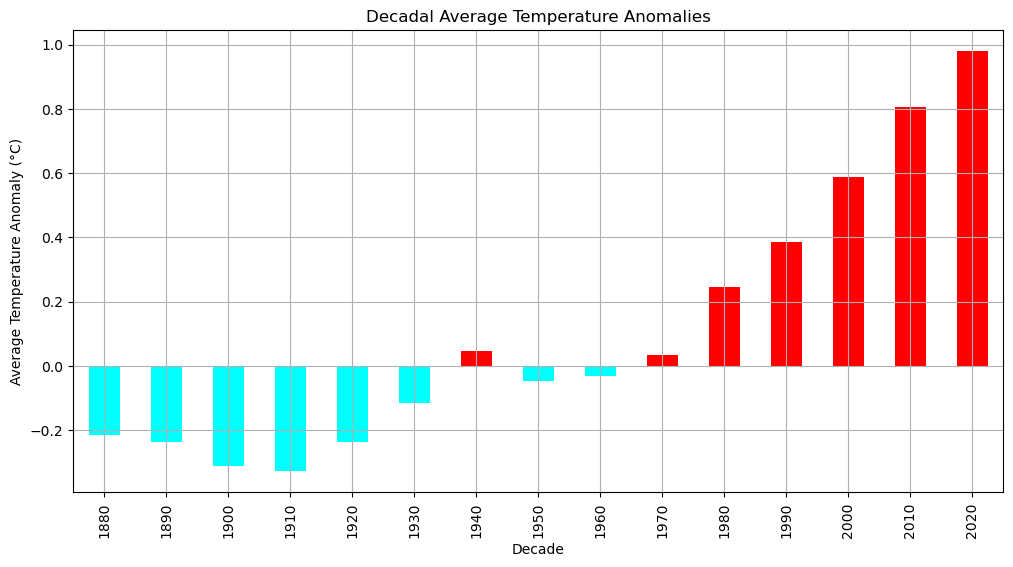

In [14]:
for month in df.columns[1:]:
    df[month] = pd.to_numeric(df[month], errors='coerce')
df['Decade'] = (df['Year'] // 10) * 10
decadal_avg = df.groupby('Decade')['J-D'].mean()
colors = ['cyan' if val < 0 else 'red' for val in decadal_avg]
plt.figure(figsize=(12, 6))
decadal_avg.plot(kind='bar', color=colors)
plt.title('Decadal Average Temperature Anomalies')
plt.xlabel('Decade')
plt.ylabel('Average Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

# Decadal Average Temperature Anomalies

The bar chart above illustrates the decadal average temperature anomalies, calculated from the monthly temperature data. Each bar represents the average temperature anomaly for a ten-year period, with the following color coding:

- **Cyan Bars**: Indicate periods with negative temperature anomalies, suggesting that the average temperature was below the baseline (historical average).
- **Red Bars**: Represent periods with positive temperature anomalies, indicating that the average temperature was above the baseline.

## Interpretation

1. **Trends Over Time**: 
   - The graph provides a clear visualization of how temperature anomalies have shifted over the decades. 
   - A consistent increase in the number of red bars in more recent decades could suggest a warming trend, reflecting climate change effects.

2. **Significant Anomalies**:
   - The magnitude of the anomalies can indicate the severity of temperature changes over time. Large red bars signify notable warming periods, which may correlate with industrialization, greenhouse gas emissions, or other anthropogenic factors.

3. **Potential Implications**:
   - A trend towards higher positive anomalies may have significant implications for global climate patterns, ecosystems, and weather extremes.
   - These changes could affect agriculture, sea levels, biodiversity, and human health.



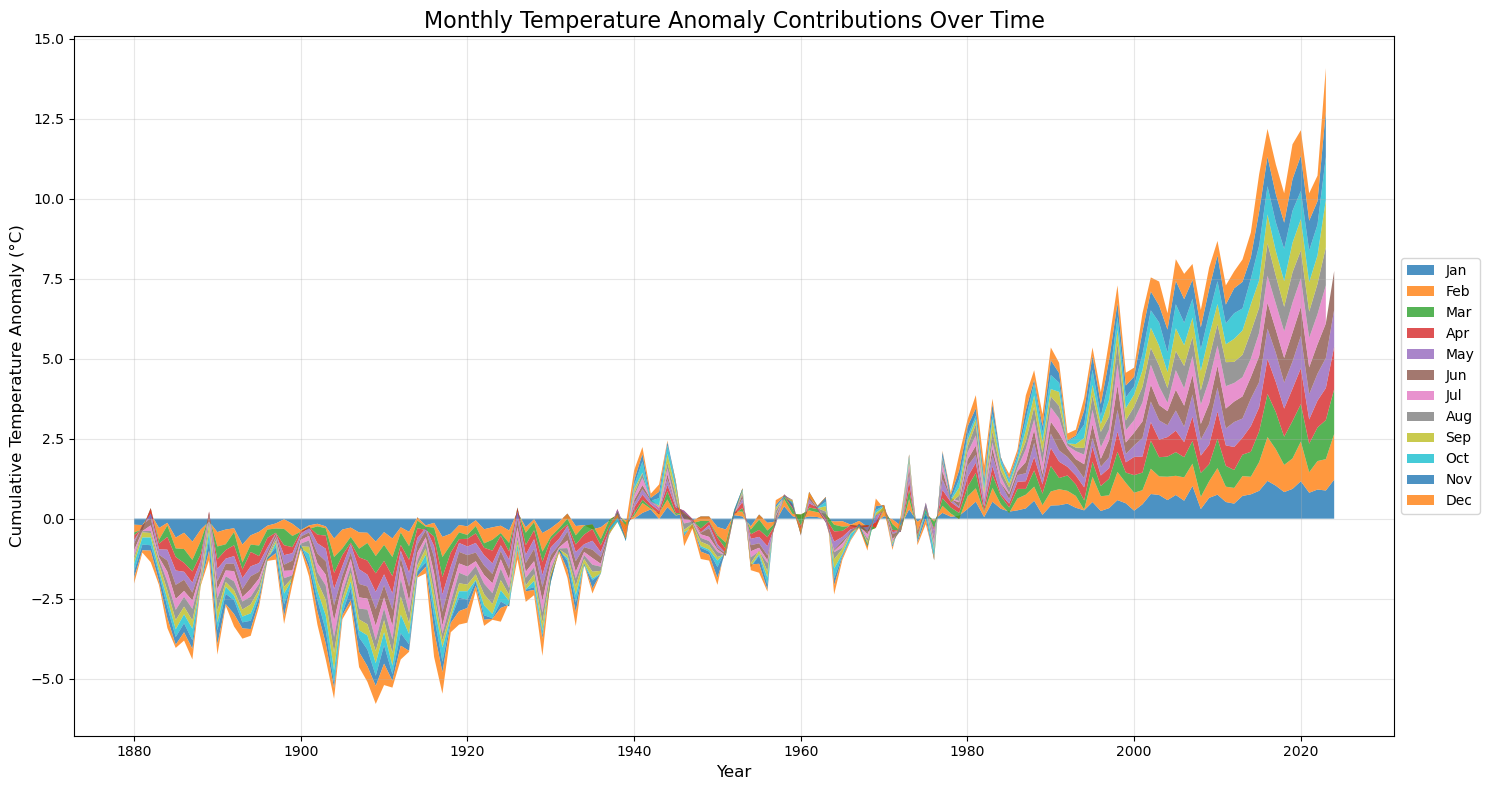

In [21]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = df[['Year'] + months].set_index('Year')
fig, ax = plt.figure(figsize=(15, 8)), plt.axes()
x = data.index
y = data.values.T
y_stack = np.cumsum(y, axis=0)
ax.fill_between(x, y_stack[0], label=months[0], alpha=0.8)
for i in range(1, len(months)):
    ax.fill_between(x, y_stack[i-1], y_stack[i], label=months[i], alpha=0.8)
ax.set_title('Monthly Temperature Anomaly Contributions Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Cumulative Temperature Anomaly (°C)', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly Temperature Anomaly Contributions Over Time)

This river plot visualizes the cumulative contributions of monthly temperature anomalies over time, offering a unique perspective on climate trends.

## Plot Features

1. **X-axis**: Represents the years, spanning from the earliest to the most recent data point.
2. **Y-axis**: Shows the cumulative temperature anomaly in degrees Celsius (°C).
3. **Colored Streams**: Each colored stream represents a month, with 12 streams in total.

## Key Elements

1. **Stream Width**: The width of each stream at any point indicates the temperature anomaly for that specific month and year.
2. **Cumulative Effect**: The total height of the river at any point shows the sum of all monthly anomalies for that year.
3. **Color Coding**: Each month is assigned a unique color, allowing for easy tracking of individual monthly trends.

## Observations

1. **Overall Trend**: 
   - The general shape of the river likely widens towards the right, indicating an overall warming trend over time.

2. **Monthly Variations**: 
   - Different widths of streams show how various months contribute differently to the annual temperature anomaly.
   - Some months may consistently show larger anomalies than others.

3. **Year-to-Year Fluctuations**: 
   - The jagged nature of the streams' edges represents year-to-year variability in temperature anomalies.

4. **Seasonal Patterns**: 
   - Repeating patterns in the stream widths may indicate consistent seasonal temperature variations.

5. **Notable Periods**: 
   - Significant expansions or contractions in the river's width could point to periods of rapid warming or cooling.

## Implications

1. **Long-term Climate Change**: 
   - The overall expansion of the river visualizes the long-term global warming trend.

2. **Monthly Contributions**: 
   - Identifies which months are contributing more significantly to annual temperature increases.

3. **Climate Variability**: 
   - Illustrates both the long-term trends and short-term variability in global temperatures.

This river plot provides a rich, intuitive visualization of how different months contribute to the overall temperature trend, allowing for a nuanced understanding of climate change patterns over time.

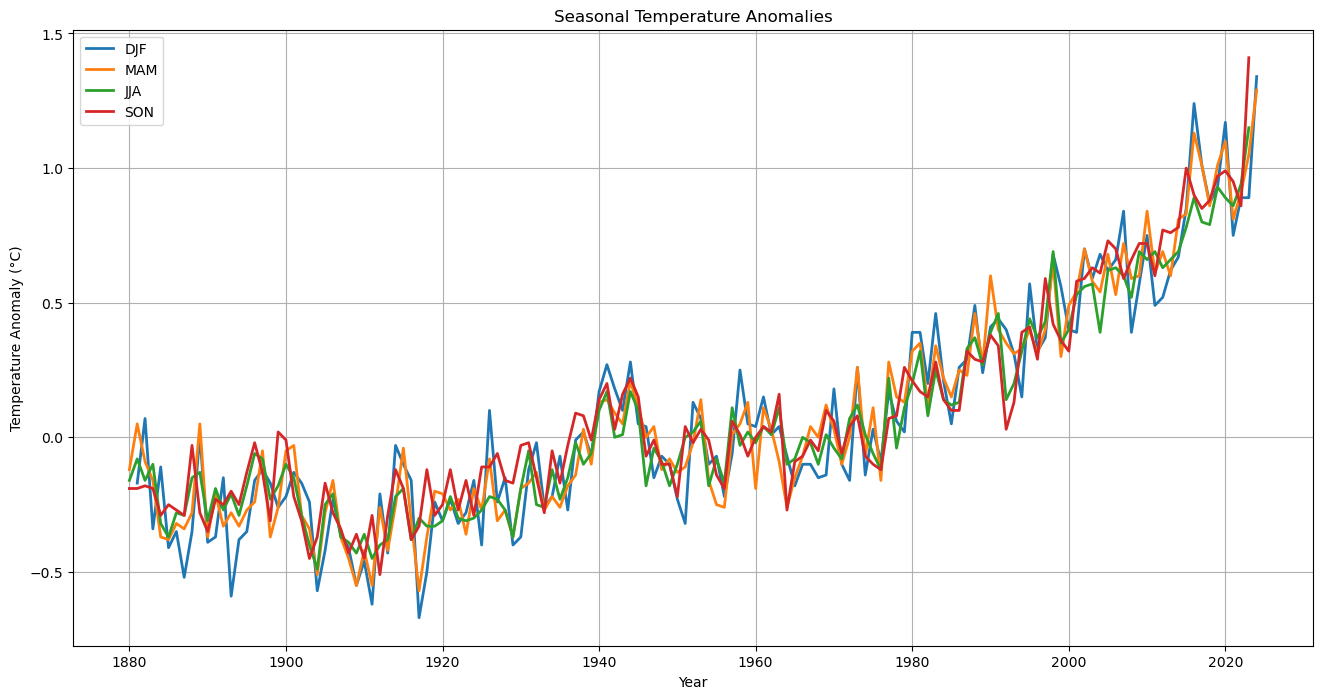

In [19]:
for month in df.columns[1:]:
    df[month] = pd.to_numeric(df[month], errors='coerce')
plt.figure(figsize=(16, 8))
plt.plot(df['Year'], df['DJF'], label='DJF', color='#1f77b4', linewidth=2)
plt.plot(df['Year'], df['MAM'], label='MAM', color='#ff7f0e', linewidth=2)
plt.plot(df['Year'], df['JJA'], label='JJA', color='#2ca02c', linewidth=2)
plt.plot(df['Year'], df['SON'], label='SON', color='#d62728', linewidth=2)
np.random.seed(0)  
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    random_years = np.random.choice(df['Year'], size=10, replace=False)
plt.title('Seasonal Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal Temperature Anomalies Over Time



This line graph illustrates the temperature anomalies for each season from 1880 to the present day, providing a comprehensive view of how global temperatures have changed across different parts of the year.

## Plot Features

1. **X-axis**: Represents the years, spanning from 1880 to the most recent data point.
2. **Y-axis**: Shows the temperature anomaly in degrees Celsius (°C).
3. **Four Colored Lines**: Each line represents a different season:
   - Blue: DJF (December, January, February) - Winter
   - Orange: MAM (March, April, May) - Spring
   - Green: JJA (June, July, August) - Summer
   - Red: SON (September, October, November) - Autumn

## Key Observations

1. **Long-term Warming Trend**: 
   - All four seasonal lines show an overall upward trend, indicating global warming across all seasons.

2. **Seasonal Variations**: 
   - The lines for different seasons don't move in perfect unison, suggesting that warming rates vary between seasons.

3. **Inter-annual Variability**: 
   - The jagged nature of the lines represents year-to-year fluctuations in temperature anomalies.

4. **Acceleration of Warming**: 
   - The slope of the lines appears to increase towards the right side of the graph, suggesting an acceleration of warming in recent decades.

5. **Seasonal Differences**: 
   - Some seasons may show more pronounced warming than others. For example, winter (DJF) might exhibit a steeper trend compared to other seasons.

6. **Random Black Points**: 
   - Black points scattered on the lines represent randomly selected data points, potentially highlighting specific years of interest or extreme anomalies.

## Implications

1. **Comprehensive Climate Change View**: 
   - By showing all seasons together, the graph provides a holistic view of climate change, demonstrating that warming is occurring across all parts of the year.

2. **Seasonal Impacts**: 
   - Different warming rates between seasons could have varied impacts on ecosystems, agriculture, and human activities that are sensitive to seasonal patterns.

3. **Climate Variability**: 
   - The graph illustrates both long-term trends and short-term variability, showcasing the complex nature of climate change.

4. **Policy Relevance**: 
   - The clear warming trends across all seasons underscore the need for comprehensive climate action and adaptation strategies.

This visualization effectively communicates the reality of global warming while also revealing the nuances of how climate change affects different seasons. It serves as a powerful tool for understanding the long-term changes in our global climate system.